## 두 평균의 비교 Preview
- 두 평균의 비교는 실무에서 자주 쓰이는 테스트이기 때문에 잘 배우도록 한다. 
- 하나의 모수에 대해 두 그룹의 값이 같은지 검정하는 것
  + 만약 가정을 충족하면 Independent Sample T-Test / 충족하지 못하면 Mann-Whitney Test or Welch Test를 사용한다. 

## 데이터 불러오기
- 데이터를 불러오도록 한다.
- 데이터는 각 tutor의 클래스별 학생들의 점수를 나열한 것이다.  
  + Anastasia(N=15)  & Bernadette(N=18)

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/harpo.csv")
df.head()

,grade,tutor
0,65,Anastasia
1,72,Bernadette
2,66,Bernadette
3,74,Anastasia
4,73,Anastasia


## 두 개의 검정
- Student's T-Tesst
  + 모수 검정 : 엄격한 가정 적용
- Welch's 
  + 비모수 검정 : 가정에 대해 유연함

### 가정
- 독립된 관측치 (Independent Observations)
  + 두 그룹의 관측값은 서로 특별한 관계가 없다. 
- 정규성 (Normality)
  + 정규 분포를 따른다. 만약 Sample Size가 N > 30 이면 고려하지 않아도 됨
  + 가정 위반 시, Mann-Whitney Test
- 등분산성 가정 
  + Levene's 검정 위반 시, Welch Test


## 등분산성 위배의 의미
- Homogeneity of variance
- 각 그룹의 분산은 동일하다. 현실적으로는 각 그룹의 분산이 동일하다는 것은 기대하기 어렵다. 

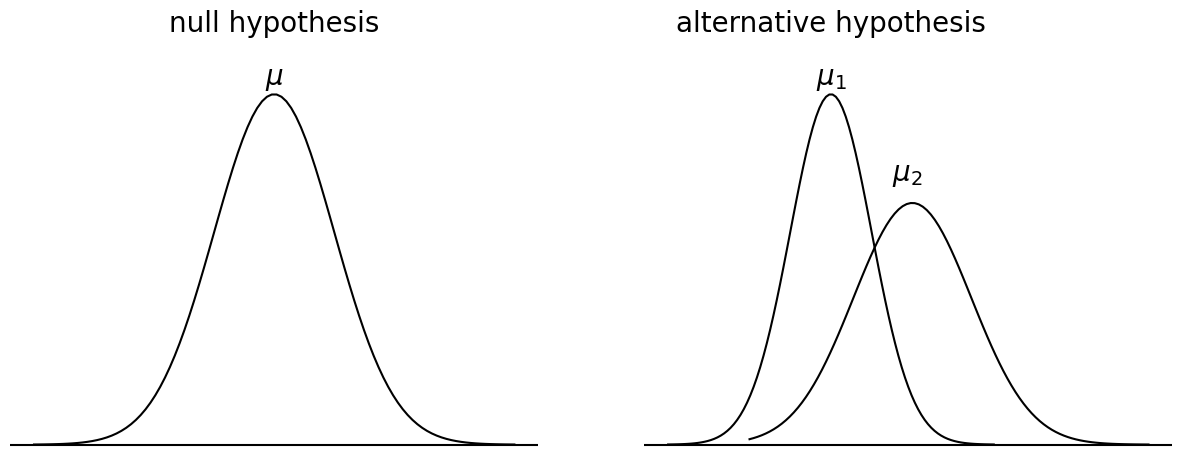

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

sigma = 1
mu1 = 0
sigma1 = 1
mu2 = 2
sigma2 = 1.45

x1 = np.linspace(mu1 - 4*sigma, mu1 + 4*sigma1, 100)
y1 = 100* stats.norm.pdf(x1, mu1, sigma1)
x2 = np.linspace(mu2 - 4*sigma, mu2 + 4*sigma2, 100)
y2 = 100* stats.norm.pdf(x2, mu2, sigma2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


sns.lineplot(x=x1,y=y1, color='black', ax = ax1)

sns.lineplot(x=x1,y=y1, color='black', ax = ax2)
sns.lineplot(x=x2,y=y2, color='black', ax = ax2)

ax1.text(0, 47, 'null hypothesis', size=20, ha="center")
ax2.text(0, 47, 'alternative hypothesis', size=20, ha="center")

ax1.text(0, 41, r'$\mu$', size=20, ha="center")
ax2.text(0, 41, r'$\mu_1$', size=20, ha="center")
ax2.text(1.50, 30, r'$\mu_2$', size=20, ha="left")

ax1.set_frame_on(False)
ax2.set_frame_on(False)
ax1.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax1.axhline(y=0, color='black')
ax2.axhline(y=0, color='black')

## 가설
- 귀무가설 : 두 그룹의 평균은 같다. 
- 대립가설 : 두 그룹의 평균은 같지 않다. 
- 이를 시각적으로 비교하면 아래와 같이 표현된다. 

## 데이터 가공
- 기존 데이터의 Long 형태의 테이블에서 Wide 형태의 테이블로 변경해야 한다. 

In [2]:
wide_df = pd.pivot(df, columns = 'tutor', values = 'grade')
wide_df.head()

tutor,Anastasia,Bernadette
0,65.0,NaN
1,NaN,72.0
2,NaN,66.0
3,74.0,NaN
4,73.0,NaN


## 테스트
- NaN은 숫자가 아님의 약자이다. 
- 별도로 처리해야 하지만, ttest()는 이를 적절하게 처리할 수 있는 기능이 있다. 

In [3]:
!pip install --upgrade pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=2527647f72a7e63fbe6f8b1a5a38afc8b12a7eb4041daa1feed8c8bda8c58f3a
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


- t-test

In [12]:
from pingouin import ttest
ttest(wide_df['Anastasia'], wide_df['Bernadette'], correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.115432,31,two-sided,0.042529,"[0.2, 10.76]",0.739561,1.755,0.53577


- levene test
  + 귀무가설 : 두 그룹의 분산은 같음
  + 대립가설 : 두 그룹의 분산은 다름
- 테스트 결과 p.val은 .15 이므로 귀무가설을 채택한다. 즉, 두 그룹의 분산은 같다고 본다. 

In [14]:
from pingouin import homoscedasticity

homoscedasticity(data = df, dv = 'grade', group = 'tutor')

,W,pval,equal_var
levene,2.128701,0.154622,True


- Welch Test
  + 여기에서 사실 Welch Test를 사용할 필요는 없다. 그러나, 한번 사용하도록 한다. 

In [13]:
from pingouin import ttest
ttest(wide_df['Anastasia'], wide_df['Bernadette'], correction = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.034187,23.024806,two-sided,0.05361,"[-0.09, 11.05]",0.739561,1.556,0.53577


- corection = True가 의미하는 것은 실제로 Welch Test를 수행하라는 말이다. 

- 결과 보고서는 아래와 같이 작성할 수 있다. 
| Anastasia’s 클래스의 평균 점수는 74.5점이고 (std dev = 9.0), 반면에 Bernadette 클래스의 평균 점수는 69.1이고 (std dev 5.8)이다. 독립 평균 샘플 t-test 결과 약 5.4점 차이가 유의미하게 다르게 나타난다 $(t(31) = 2.1, p < .05)$
